In [28]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# set configurations
sample_size = 500
nr_sample_sets = 20
num_steps = 200
x_b = np.linspace(0,1,num_steps)

n_folds = 5

### Bounded distributions

In [29]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [30]:
kde_df = dem.get_kde(bounded_samples, x_b)
kde_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.952978,1.013484,1.073973,1.134087,1.193468,1.251766,1.308639,1.363762,1.416828,1.467555,...,0.081437,0.074797,0.068518,0.062600,0.057039,0.051829,0.046964,0.042435,0.038231,beta_1_2
1,0.974242,1.029079,1.083182,1.136221,1.187877,1.237849,1.285855,1.331642,1.374980,1.415675,...,0.086921,0.080055,0.073488,0.067232,0.061299,0.055695,0.050424,0.045487,0.040884,beta_1_2
2,1.033059,1.089643,1.145279,1.199623,1.252346,1.303141,1.351729,1.397864,1.441332,1.481958,...,0.127731,0.120756,0.113896,0.107161,0.100564,0.094121,0.087844,0.081747,0.075844,beta_1_2


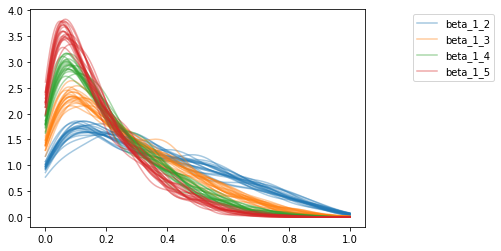

In [31]:
dem.get_kde_plot(kde_df,x_b)

In [32]:
bounded_samples_st = dm.get_st_samples(bounded_dists, nr_sample_sets, sample_size)
min_ = np.percentile(bounded_samples_st.iloc[:,:-1],2.5)
max_ = np.percentile(bounded_samples_st.iloc[:,:-1],97.5)
x_b_st = np.linspace(min_, max_, num_steps)
kde_df = dem.get_kde(bounded_samples_st, x_b_st)
kde_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.309849,0.320095,0.329994,0.339510,0.348613,0.357271,0.365462,0.373162,0.380355,0.387027,...,0.075682,0.074024,0.072321,0.070577,0.068794,0.066973,0.065117,0.063231,0.061317,beta_1_2
1,0.331638,0.339376,0.346624,0.353366,0.359589,0.365285,0.370450,0.375084,0.379187,0.382768,...,0.061388,0.059566,0.057757,0.055955,0.054159,0.052368,0.050580,0.048794,0.047011,beta_1_2
2,0.314500,0.324382,0.333826,0.342800,0.351277,0.359235,0.366657,0.373531,0.379852,0.385617,...,0.070187,0.068531,0.066879,0.065232,0.063589,0.061952,0.060320,0.058694,0.057074,beta_1_2


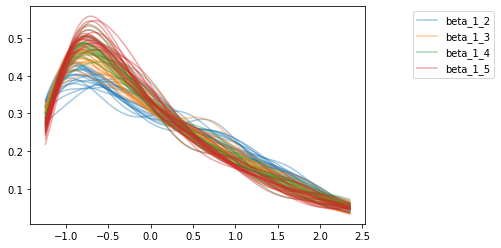

In [33]:
dem.get_kde_plot(kde_df,x_b_st)

### SVM

In [53]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = list(np.arange(1,21))

In [59]:
res_svm = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, 'kde', 1)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [17]:
res_svm.to_csv('results/kde/res_svm_bounded.csv')

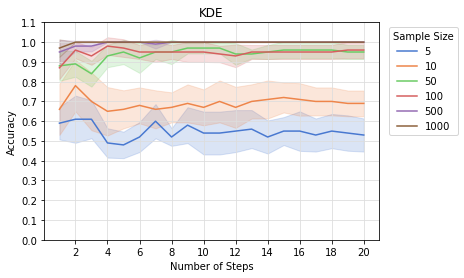

In [60]:
cm.plot_cv_numsteps_samplesize(res_svm,'KDE')

### Logistic Regression

In [16]:
res_lr = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, n_folds, 'kde', 2)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [17]:
res_lr.to_csv('results/kde/res_lr_bounded.csv')

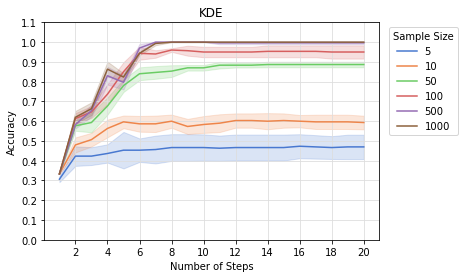

In [30]:
cm.plot_cv_numsteps_samplesize(res_lr,'KDE')

### Heavytail distributions

In [37]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size, transform=False)
heavytail_samples_st = dm.get_st_samples(heavytail_dists, nr_sample_sets, sample_size, transform=False)
#dm.plot_histograms_of_samples(heavytail_samples)

In [38]:
perc_95 = np.percentile(heavytail_samples_st.iloc[:,:-1],97.5)
x_h = np.linspace(0,perc_95,num_steps)
kde_df = dem.get_kde(heavytail_samples_st, x_h)
kde_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.917758,0.902478,0.886909,0.871083,0.855029,0.838780,0.822364,0.805811,0.789151,0.772411,...,0.013310,0.013397,0.013486,0.013578,0.013670,0.013763,0.013857,0.013950,0.014043,cauchy
1,1.153246,1.137654,1.121323,1.104294,1.086609,1.068313,1.049449,1.030063,1.010200,0.989906,...,0.011186,0.011182,0.011178,0.011174,0.011170,0.011167,0.011163,0.011159,0.011155,cauchy
2,0.960359,0.943749,0.926783,0.909498,0.891929,0.874112,0.856083,0.837876,0.819525,0.801065,...,0.020280,0.020084,0.019886,0.019687,0.019485,0.019282,0.019077,0.018870,0.018661,cauchy


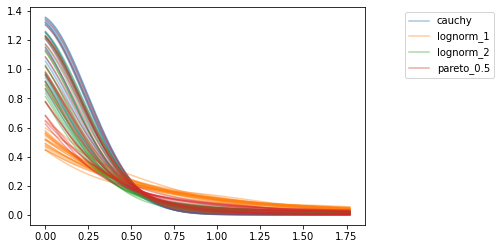

In [39]:
dem.get_kde_plot(kde_df,x_h)

### SVM

In [22]:
res_svm_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, n_folds, 'kde', 1, transform=True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [23]:
res_svm_ht.to_csv('results/kde/res_svm_heavytail.csv')

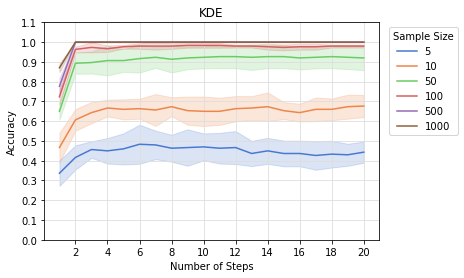

In [26]:
cm.plot_cv_numsteps_samplesize(res_svm_ht,'KDE')

### Logististic Regression

In [28]:
res_lr_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, n_folds, 'kde', 2, transform = True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [38]:
res_lr_ht.to_csv('results/kde/res_lr_heavytail.csv')

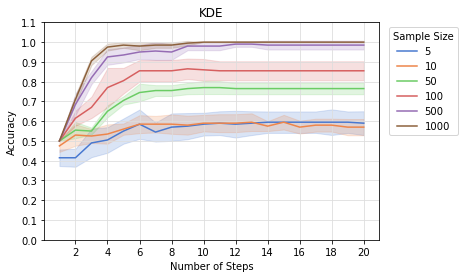

In [29]:
cm.plot_cv_numsteps_samplesize(res_lr_ht,'KDE')